In [3]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt

In [4]:
conn = mysql.connector.connect(
  host="localhost",
  db = "babynames",
  user="root",
  password="123456789"
)

In [5]:
babynames = pd.read_sql('SELECT * from vornamen', conn)

C:\Users\matte\AppData\Local\Temp\ipykernel_21532\4247649448.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  babynames = pd.read_sql('SELECT * from vornamen', conn)


In [6]:
babynames.head()

,jahr_id,bezirk_id,geschlecht_bin,vorname,anzahl
0,1984,101,1,Andreas,4
1,1984,101,1,Bernd,1
2,1984,101,1,Christian,2
3,1984,101,1,Christoph,2
4,1984,101,1,Clemens,1


In [7]:
#names per year general
babynames_py = babynames.groupby('jahr_id')['anzahl'].sum().reset_index()
babynames_py.head()

,jahr_id,anzahl
0,1984,83856
1,1985,82379
2,1986,82056
3,1987,81351
4,1988,82545


In [8]:
#most_pop_malenames
male_names = pd.read_sql('SELECT DISTINCT jahr_id, vorname, anzahl FROM names_per_year WHERE geschlecht_bin = "1" ORDER BY Anzahl DESC;', conn)

C:\Users\matte\AppData\Local\Temp\ipykernel_21532\2392885378.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  male_names = pd.read_sql('SELECT DISTINCT jahr_id, vorname, anzahl FROM names_per_year WHERE geschlecht_bin = "1" ORDER BY Anzahl DESC;', conn)


In [9]:
males_names_per_year = male_names.groupby('jahr_id')['anzahl'].sum().reset_index()
males_names_per_year.head()

,jahr_id,anzahl
0,1984,42758.0
1,1985,42416.0
2,1986,42062.0
3,1987,41653.0
4,1988,42519.0


In [10]:
#mostpop_femalenames
female_names = pd.read_sql('SELECT DISTINCT jahr_id, vorname, anzahl FROM names_per_year WHERE geschlecht_bin = "2" ORDER BY Anzahl DESC;', conn)

C:\Users\matte\AppData\Local\Temp\ipykernel_21532\786493315.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  female_names = pd.read_sql('SELECT DISTINCT jahr_id, vorname, anzahl FROM names_per_year WHERE geschlecht_bin = "2" ORDER BY Anzahl DESC;', conn)


In [11]:
females_names_per_year = female_names.groupby('jahr_id')['anzahl'].sum().reset_index()
females_names_per_year.head()

,jahr_id,anzahl
0,1984,41098.0
1,1985,39963.0
2,1986,39994.0
3,1987,39698.0
4,1988,40026.0


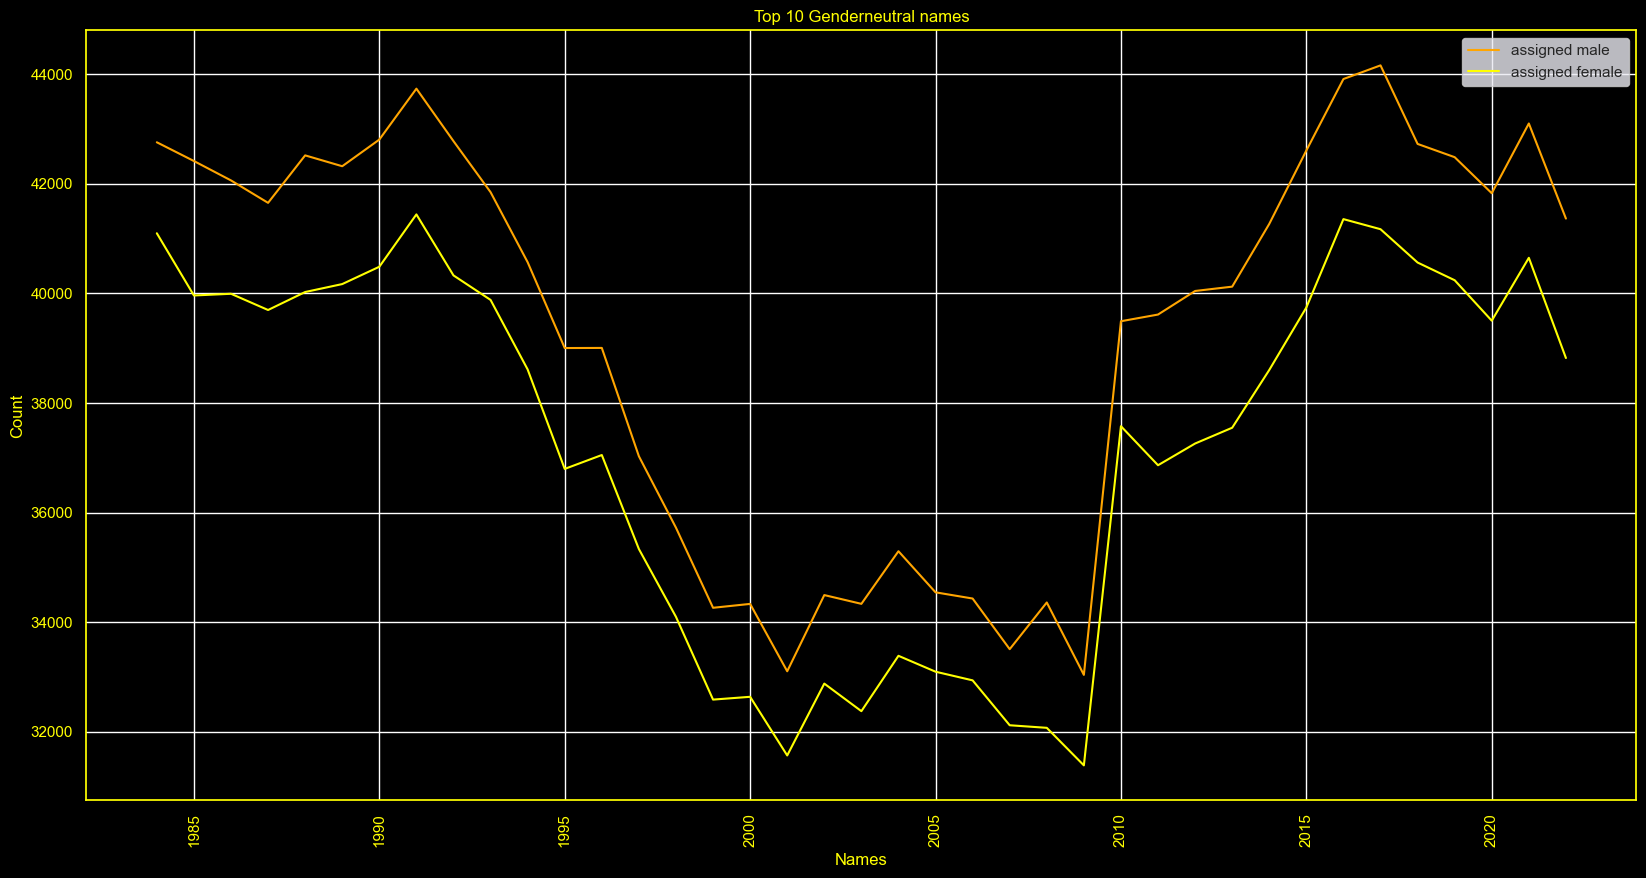

In [12]:
import seaborn as sns
# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(20,10),facecolor='black')

#Set the axes background color
plt.gca().set_facecolor('black')

plt.gca().spines['bottom'].set_color('yellow')
plt.gca().spines['left'].set_color('yellow')
plt.gca().spines['top'].set_color('yellow')
plt.gca().spines['right'].set_color('yellow')

# Plot the counts
sns.lineplot(x='jahr_id', y='anzahl', data=males_names_per_year, color='orange', label='assigned male')
sns.lineplot(x='jahr_id', y='anzahl', data=females_names_per_year, color='yellow', label='assigned female')

plt.title('Top 10 Genderneutral names', color='yellow')
plt.xlabel('Names', color='yellow')
plt.ylabel('Count', color='yellow')
plt.legend()

#Change tick colors to yellow
plt.tick_params(colors='yellow')

#Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=90)

plt.show()

In [13]:
genderneutral_count = pd.read_sql('SELECT v.vorname, sum(v.anzahl) AS Anzahl, v.geschlecht_bin, v.jahr_id FROM names_per_year v JOIN geschlvorn g ON v.vorname = g.vorname GROUP BY v.vorname, v.geschlecht_bin, v.jahr_id ORDER BY v.vorname;', conn)
genderneutral_count.head()

C:\Users\matte\AppData\Local\Temp\ipykernel_21532\3328668579.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  genderneutral_count = pd.read_sql('SELECT v.vorname, sum(v.anzahl) AS Anzahl, v.geschlecht_bin, v.jahr_id FROM names_per_year v JOIN geschlvorn g ON v.vorname = g.vorname GROUP BY v.vorname, v.geschlecht_bin, v.jahr_id ORDER BY v.vorname;', conn)


,vorname,Anzahl,geschlecht_bin,jahr_id
0,Abir,1.0,1,2007
1,Abir,1.0,1,2015
2,Abir,1.0,1,2019
3,Abir,1.0,2,2004
4,Abir,1.0,2,2011


In [14]:
genderneutral_count = genderneutral_count.groupby(['vorname', 'geschlecht_bin'])['Anzahl'].sum().reset_index()
genderneutral_count


,vorname,geschlecht_bin,Anzahl
0,Abir,1,3.0
1,Abir,2,3.0
2,Abrar,1,7.0
3,Abrar,2,23.0
4,Ada,1,13.0
...,...,...,...
1487,Ömür,2,4.0
1488,Özden,1,6.0
1489,Özden,2,3.0
1490,Özlem,1,2.0


In [15]:
# Calculate the total count for each name
name_totals = genderneutral_count.groupby('vorname')['Anzahl'].sum().reset_index()
name_totals

,vorname,Anzahl
0,Abir,6.0
1,Abrar,30.0
2,Ada,269.0
3,Adama,8.0
4,Adar,45.0
...,...,...
743,Zihan,4.0
744,Zoe,2137.0
745,Ömür,25.0
746,Özden,9.0


In [16]:
# Merge DataFrames based on 'vorname' column
genderneutral_count = pd.merge(genderneutral_count, name_totals[['vorname', 'Anzahl']], on='vorname', how='left')

# Rename
genderneutral_count.rename(columns={'Anzahl_x': 'Anzahl', 'Anzahl_y': 'total_count'}, inplace=True)


print(genderneutral_count)


     vorname  geschlecht_bin  Anzahl  total_count
0       Abir               1     3.0          6.0
1       Abir               2     3.0          6.0
2      Abrar               1     7.0         30.0
3      Abrar               2    23.0         30.0
4        Ada               1    13.0        269.0
...      ...             ...     ...          ...
1487    Ömür               2     4.0         25.0
1488   Özden               1     6.0          9.0
1489   Özden               2     3.0          9.0
1490   Özlem               1     2.0         78.0
1491   Özlem               2    76.0         78.0

[1492 rows x 4 columns]


In [17]:
genderneutral_count['percentage'] = genderneutral_count['Anzahl'] / genderneutral_count['total_count']
genderneutral_count

,vorname,geschlecht_bin,Anzahl,total_count,percentage
0,Abir,1,3.0,6.0,0.500000
1,Abir,2,3.0,6.0,0.500000
2,Abrar,1,7.0,30.0,0.233333
3,Abrar,2,23.0,30.0,0.766667
4,Ada,1,13.0,269.0,0.048327
...,...,...,...,...,...
1487,Ömür,2,4.0,25.0,0.160000
1488,Özden,1,6.0,9.0,0.666667
1489,Özden,2,3.0,9.0,0.333333
1490,Özlem,1,2.0,78.0,0.025641


In [18]:
percentages_1 = genderneutral_count[genderneutral_count['geschlecht_bin']==1]
percentages_2 = genderneutral_count[genderneutral_count['geschlecht_bin']==2]
percentages_total = pd.merge(percentages_1, percentages_2[['vorname', 'percentage', 'Anzahl']], on='vorname', how='left')
percentages_total = percentages_total.drop(columns=['geschlecht_bin'])
percentages_total.rename(columns={'percentage_x': 'percentage_1', 'percentage_y': 'percentage_2', 'Anzahl_x': 'anzahl_1', 'Anzahl_y': 'anzahl_2'}, inplace=True)
percentages_total.head()


,vorname,anzahl_1,total_count,percentage_1,percentage_2,anzahl_2
0,Abir,3.0,6.0,0.500000,0.500000,3.0
1,Abrar,7.0,30.0,0.233333,0.766667,23.0
2,Ada,13.0,269.0,0.048327,0.951673,256.0
3,Adama,3.0,8.0,0.375000,0.625000,5.0
4,Adar,42.0,45.0,0.933333,0.066667,3.0


In [19]:
filtered_names = percentages_total[
    (percentages_total['percentage_1'] > 0.2) & (percentages_total['percentage_2'] > 0.2)
]
top_10_names = filtered_names.nlargest(10, 'total_count')
print(top_10_names)

       vorname  anzahl_1  total_count  percentage_1  percentage_2  anzahl_2
519     Nikola    1070.0       1351.0      0.792006      0.207994     281.0
160  Dominique     196.0        580.0      0.337931      0.662069     384.0
512     Nicola     181.0        558.0      0.324373      0.675627     377.0
525        Noa     202.0        297.0      0.680135      0.319865      95.0
397      Lorin      74.0        241.0      0.307054      0.692946     167.0
516     Nikita     121.0        235.0      0.514894      0.485106     114.0
197      Elvin     161.0        232.0      0.693966      0.306034      71.0
366     Lauren      35.0        174.0      0.201149      0.798851     139.0
351      Kayra      90.0        173.0      0.520231      0.479769      83.0
349       Kaya      28.0        123.0      0.227642      0.772358      95.0


In [20]:
filtered_names

,vorname,anzahl_1,total_count,percentage_1,percentage_2,anzahl_2
0,Abir,3.0,6.0,0.500000,0.500000,3.0
1,Abrar,7.0,30.0,0.233333,0.766667,23.0
3,Adama,3.0,8.0,0.375000,0.625000,5.0
5,Adel,65.0,107.0,0.607477,0.392523,42.0
6,Adelin,8.0,12.0,0.666667,0.333333,4.0
...,...,...,...,...,...,...
738,Zerin,3.0,11.0,0.272727,0.727273,8.0
739,Zheng,4.0,6.0,0.666667,0.333333,2.0
740,Zi,22.0,33.0,0.666667,0.333333,11.0
741,Zihan,2.0,4.0,0.500000,0.500000,2.0


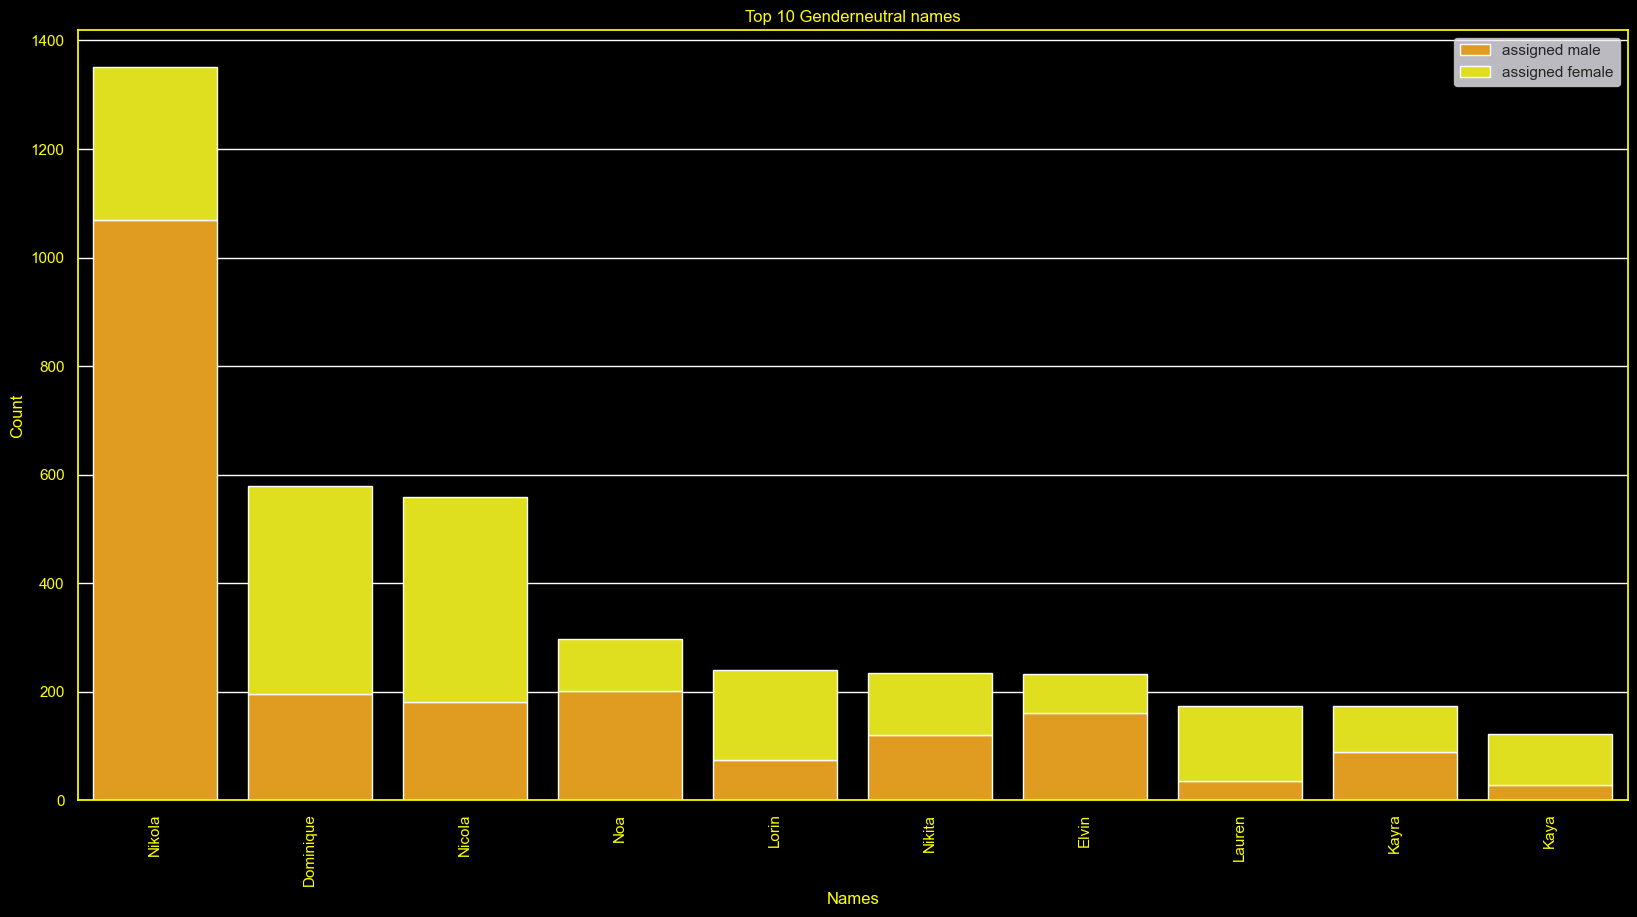

In [21]:

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(20,10),facecolor='black')

#Set the axes background color
plt.gca().set_facecolor('black')

plt.gca().spines['bottom'].set_color('yellow')
plt.gca().spines['left'].set_color('yellow')
plt.gca().spines['top'].set_color('yellow')
plt.gca().spines['right'].set_color('yellow')

# Plot the counts
sns.barplot(x='vorname', y='anzahl_1', data=top_10_names, color='orange', label='assigned male')
sns.barplot(x='vorname', y='anzahl_2', data=top_10_names, color='yellow', label='assigned female', bottom=top_10_names['anzahl_1'])

plt.title('Top 10 Genderneutral names', color='yellow')
plt.xlabel('Names', color='yellow')
plt.ylabel('Count', color='yellow')
plt.legend()

#Change tick colors to yellow
plt.tick_params(colors='yellow')

#Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=90)

plt.show()

In [22]:
filtered_babynames = babynames[babynames['vorname'].isin(filtered_names['vorname'])]
filtered_babynames.head()

,jahr_id,bezirk_id,geschlecht_bin,vorname,anzahl
628,1984,106,2,Nicola,1
1272,1984,201,1,Nicola,1
1299,1984,201,1,Sunna,1
1353,1984,201,2,Gerit,1
1379,1984,201,2,Karen,1


In [23]:
#genderneutral names per year
genderneutral_names_per_year = filtered_babynames.groupby('jahr_id')['anzahl'].sum().reset_index()
genderneutral_names_per_year.head()

,jahr_id,anzahl
0,1984,75
1,1985,84
2,1986,113
3,1987,106
4,1988,101


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


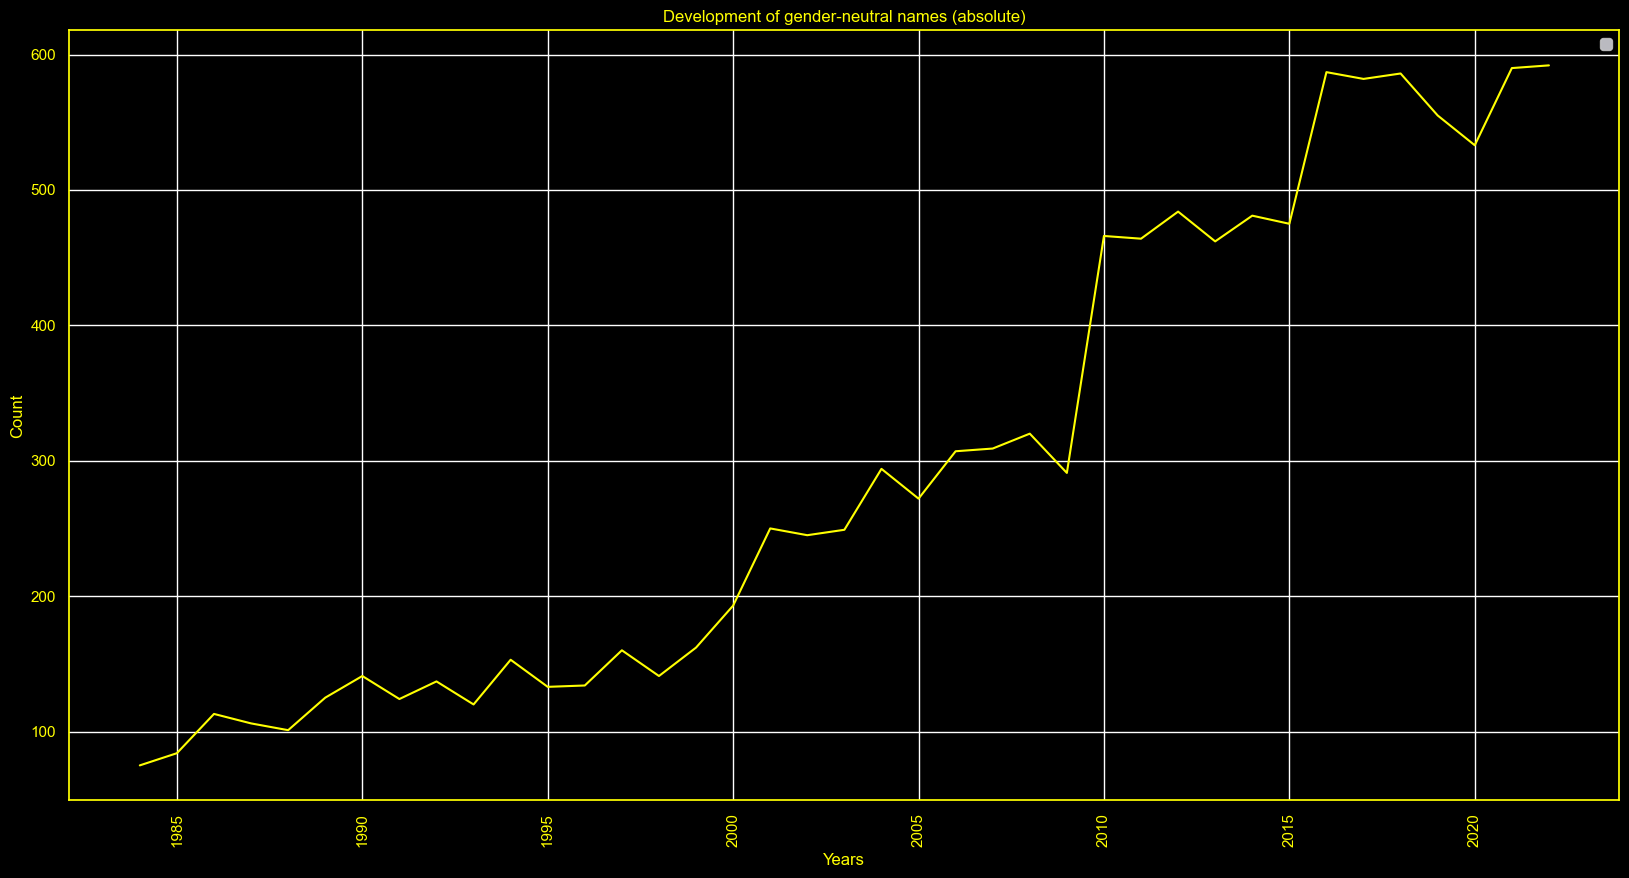

In [24]:
import seaborn as sns
#plot of absolute numbers
sns.set(style="darkgrid")
plt.figure(figsize=(20,10),facecolor='black')

#Set the axes background color
plt.gca().set_facecolor('black')

plt.gca().spines['bottom'].set_color('yellow')
plt.gca().spines['left'].set_color('yellow')
plt.gca().spines['top'].set_color('yellow')
plt.gca().spines['right'].set_color('yellow')


sns.lineplot(x='jahr_id', y='anzahl', data=genderneutral_names_per_year, color='yellow')



plt.title('Development of gender-neutral names (absolute)', color='yellow')
plt.xlabel('Years', color='yellow')
plt.ylabel('Count', color='yellow')
plt.legend()

#Change tick colors to yellow
plt.tick_params(colors='yellow')

#Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=90)

plt.show()


In [25]:
#names per year general
babynames_py = babynames.groupby('jahr_id')['anzahl'].sum().reset_index()
babynames_py.rename(columns={'anzahl': 'gesamtanzahl'}, inplace=True)
babynames_py.head()

,jahr_id,gesamtanzahl
0,1984,83856
1,1985,82379
2,1986,82056
3,1987,81351
4,1988,82545


In [26]:
relative_counts = merged_df = pd.merge(babynames_py, genderneutral_names_per_year, on='jahr_id')
relative_counts['relative_number'] = relative_counts['anzahl'] / relative_counts['gesamtanzahl']
relative_counts.head()

,jahr_id,gesamtanzahl,anzahl,relative_number
0,1984,83856,75,0.000894
1,1985,82379,84,0.001020
2,1986,82056,113,0.001377
3,1987,81351,106,0.001303
4,1988,82545,101,0.001224


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


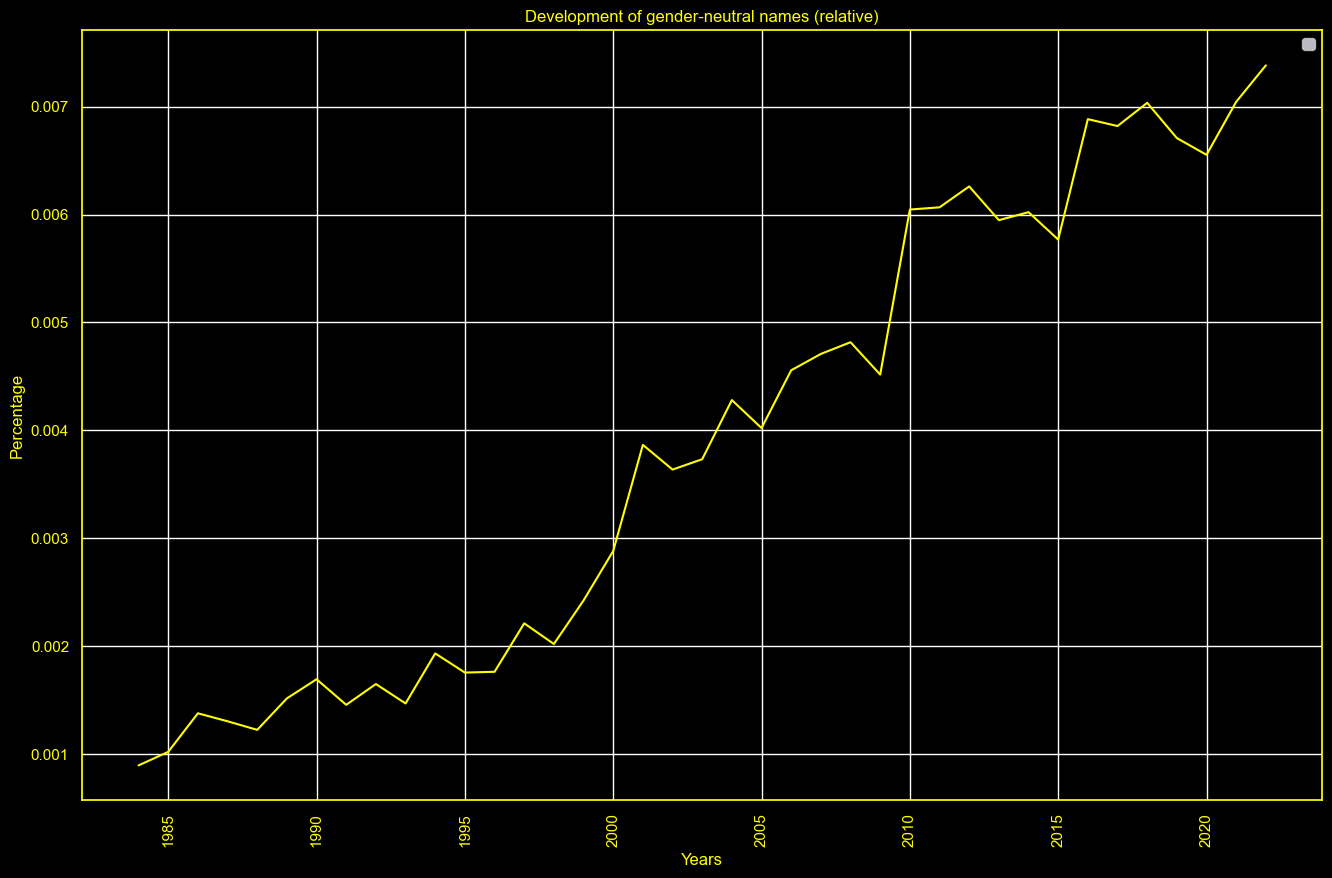

In [33]:
#plot of absolute numbers
sns.set(style="darkgrid")
plt.figure(figsize=(16,10),facecolor='black')

#Set the axes background color
plt.gca().set_facecolor('black')

plt.gca().spines['bottom'].set_color('yellow')
plt.gca().spines['left'].set_color('yellow')
plt.gca().spines['top'].set_color('yellow')
plt.gca().spines['right'].set_color('yellow')


sns.lineplot(x='jahr_id', y='relative_number', data=relative_counts, color='yellow')



plt.title('Development of gender-neutral names (relative)', color='yellow')
plt.xlabel('Years', color='yellow')
plt.ylabel('Percentage', color='yellow')
plt.legend()

#Change tick colors to yellow
plt.tick_params(colors='yellow')

#Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=90)

plt.show()


In [28]:
genderneutral_assigned_1 = filtered_babynames[filtered_babynames['geschlecht_bin']==1]
genderneutral_assigned_2 = filtered_babynames[filtered_babynames['geschlecht_bin']==2]
assigned_1_per_year = genderneutral_assigned_1.groupby('jahr_id')['anzahl'].sum().reset_index()
assigned_2_per_year = genderneutral_assigned_2.groupby('jahr_id')['anzahl'].sum().reset_index()

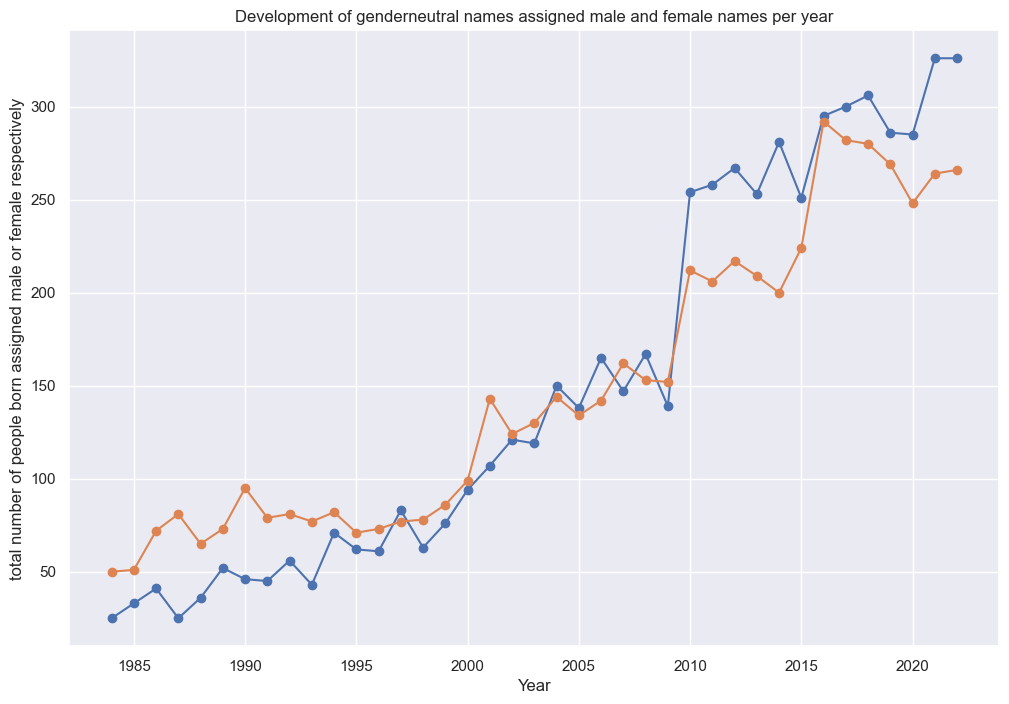

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(assigned_1_per_year['jahr_id'], assigned_1_per_year['anzahl'], marker='o')
plt.plot(assigned_2_per_year['jahr_id'], assigned_2_per_year['anzahl'], marker='o')
plt.title('Development of genderneutral names assigned male and female names per year')
plt.xlabel('Year')
plt.ylabel('total number of people born assigned male or female respectively')
plt.grid(True)
plt.show()

In [30]:
male_assigned1_merged = pd.merge(males_names_per_year, assigned_1_per_year, on='jahr_id', suffixes=('_male', '_genderneutral'))
female_assigned2_merged = pd.merge(females_names_per_year, assigned_2_per_year, on='jahr_id', suffixes=('_female', '_genderneutral'))
male_assigned1_merged.head()
female_assigned2_merged.head()

,jahr_id,anzahl_female,anzahl_genderneutral
0,1984,41098.0,50
1,1985,39963.0,51
2,1986,39994.0,72
3,1987,39698.0,81
4,1988,40026.0,65


In [31]:
male_assigned1_merged['percentage'] = male_assigned1_merged['anzahl_genderneutral'] / male_assigned1_merged['anzahl_male']
female_assigned2_merged['percentage'] = female_assigned2_merged['anzahl_genderneutral'] / female_assigned2_merged['anzahl_female']
print(male_assigned1_merged.head())
print(female_assigned2_merged.head())

   jahr_id  anzahl_male  anzahl_genderneutral  percentage
0     1984      42758.0                    25    0.000585
1     1985      42416.0                    33    0.000778
2     1986      42062.0                    41    0.000975
3     1987      41653.0                    25    0.000600
4     1988      42519.0                    36    0.000847
   jahr_id  anzahl_female  anzahl_genderneutral  percentage
0     1984        41098.0                    50    0.001217
1     1985        39963.0                    51    0.001276
2     1986        39994.0                    72    0.001800
3     1987        39698.0                    81    0.002040
4     1988        40026.0                    65    0.001624


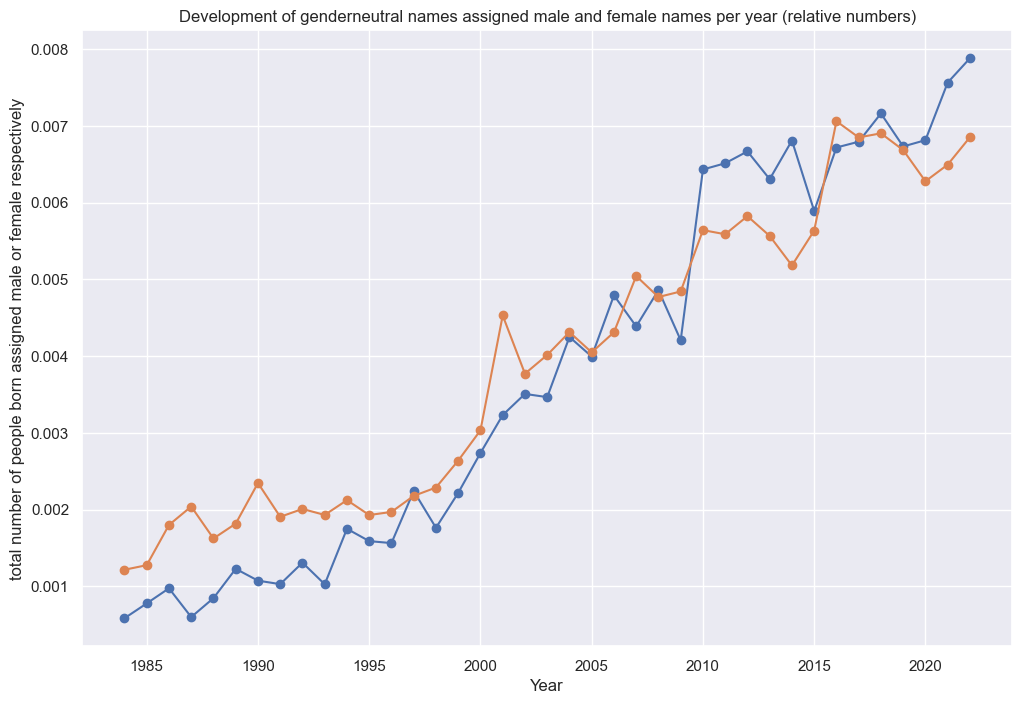

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(male_assigned1_merged['jahr_id'], male_assigned1_merged['percentage'], marker='o')
plt.plot(female_assigned2_merged['jahr_id'], female_assigned2_merged['percentage'], marker='o')
plt.title('Development of genderneutral names assigned male and female names per year (relative numbers)')
plt.xlabel('Year')
plt.ylabel('total number of people born assigned male or female respectively')
plt.grid(True)
plt.show()